# **0 PREPARACIÓN DEL ENTORNO DE TRABAJO**

In [ ]:
!pip install matplotlib
!pip install inflect
!pip install scikit-plot
!pip install num2words
!pip install scikit-learn==1.2.2
!pip install imblearn
!pip install pyspellchecker
!pip install langdetect

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import sys
# !{sys.executable} -m pip install pandas-profiling
# !pip install pandas==2.0.0

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import RidgeClassifier, LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from tqdm.notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_csv("/content/entrenamiento_estudiantes.csv")

# **1 ENTENDIMIENTO DE LOS DATOS**

## 1.1  Número de Registros y Columnas



En la siguiente celda se muestra el numero de registros y el numero de columnas del Dataframe. Este proceso es importante para el entendimiento inicial de los datos.

In [ ]:
df.shape

(7875, 2)

## 1.2 Tipo de Datos

En la siguiente celda se va a mirar la validez de los datos. Apartir del resultado, se puede mostrar que las columnas con las que vamos a trabajar (Review y Class) no tienen tipos de datos anamolos y son validos debido a las reglas de negocio.

In [ ]:
df.dtypes

Review    object
Class      int64
dtype: object

## 1.3  Primeros Registros

Se busca entender la estructura de los datos dados. Se evidencian dos columnas una llamada "Review" y otra "Class".

In [ ]:
df.head()

,Review,Class
0,Nos alojamos en una casa alquilada en la ciuda...,4
1,"La comida está bien, pero nada especial. Yo te...",3
2,"En mi opinión, no es una como muchos usuarios ...",3
3,esta curiosa forma que asemeja una silla de mo...,4
4,Lo mejor era la limonada. Me gusto la comida d...,2


## 1.4  Descripción de los Datos

Según las medidas de tendencia central de la columna "Review", el promedio del sentimiento de las personas frente a los hoteles analizados es de 3,49. Además, la desviación estándar de las reseñas de manera general es de 1.32.

In [ ]:
df.describe()

,Class
count,7875.000000
mean,3.491683
std,1.328275
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


## 1.5  Cantidad de Nulos por Columna

En la siguiente linea de codigo hicimos el analisis de completitud de los datos, lo cual nos indica si hay datos nulos. A partir de los resultados, podemos observar que esta métrica de calidad de los datos está en buen estado, ya que no se encontraron valores nulos en ninguna de las dos columnas analizadas. Esta ausencia de valores nulos es indicativa de la integridad de los datos, lo que es fundamental para realizar análisis precisos y confiables.

In [ ]:
df.isna().sum()

Review    0
Class     0
dtype: int64

## 1.6  Cantidad de Únicos por Columna

En la siguiente linea vamos a verificar la metrica de calidad de Unicidad, la cual nos indica que no hayan registros iguales. Con los resultados obtenidos, podemos saber que la variable Review no tiene registros repetidos por lo cual podemos saber que no hay errores relacionados a que un cliente envio la misma Review, como tambien, esta métrica de calidad de unicidad es esencial para garantizar la integridad y fiabilidad de la información, lo que a su vez contribuye a la precisión de cualquier análisis o modelo basado en estos datos.

In [ ]:
df.nunique()

Review    7804
Class        5
dtype: int64

## 1.7  Histograma de los Datos

El histograma muestra la distribución de frecuencias de una variable categórica con cinco clases distintas. Las barras representan la cantidad de observaciones por cada clase, observándose un incremento progresivo desde la clase 1 a la clase 5. Esta tendencia sugiere una mayor frecuencia de datos en las clases superiores, lo que podría indicar una sobrerrepresentación de las categorías con mayor número en el conjunto de datos.

array([[<Axes: title={'center': 'Class'}>]], dtype=object)

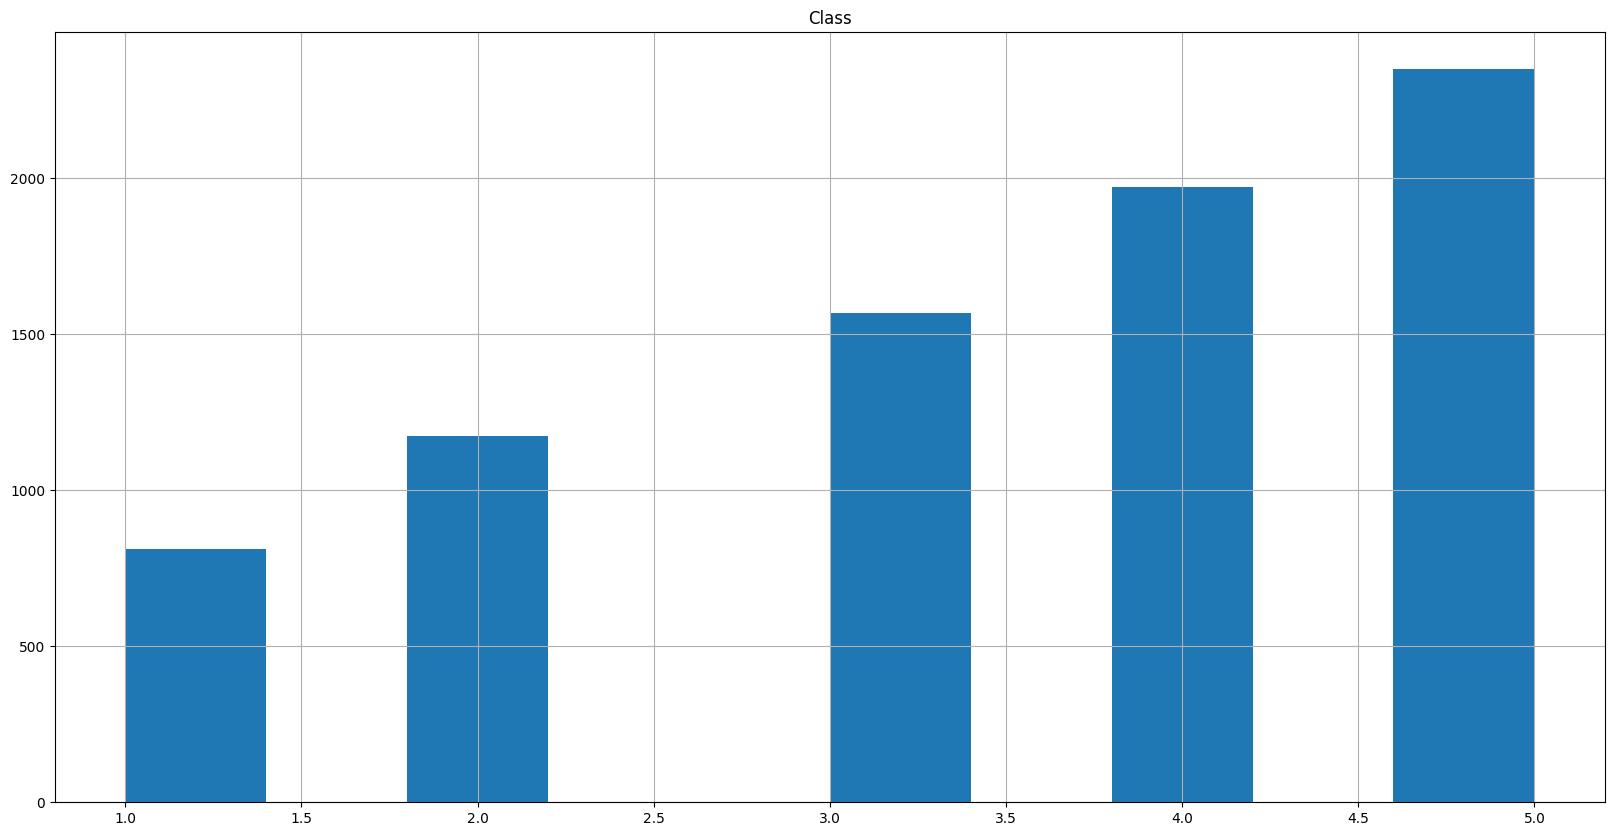

In [ ]:
%matplotlib inline
df.hist(figsize=(20,10))

## 1.8 Análisis de la Variable Objetivo

In [ ]:
pd.value_counts(df['Class'])

Class
5    2350
4    1971
3    1568
2    1173
1     813
Name: count, dtype: int64

A partir de los resultados mostrados en la grafica y el conteo de los datos, se puede validar la metrica de Consistencia debido a que la columna clase no tiene valores extraños, mal escritos y todos los registros cumplen la regla de negocio.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


El DataFrame contiene 7875 entradas sin valores nulos, con dos columnas: "Review" de tipo objeto texto y "Class" de tipo entero.

## 1.8 Análisis de la Variable Review

### 1.8.1. Grafica que muestre la distribución de la longitud de los datos en la columna Review

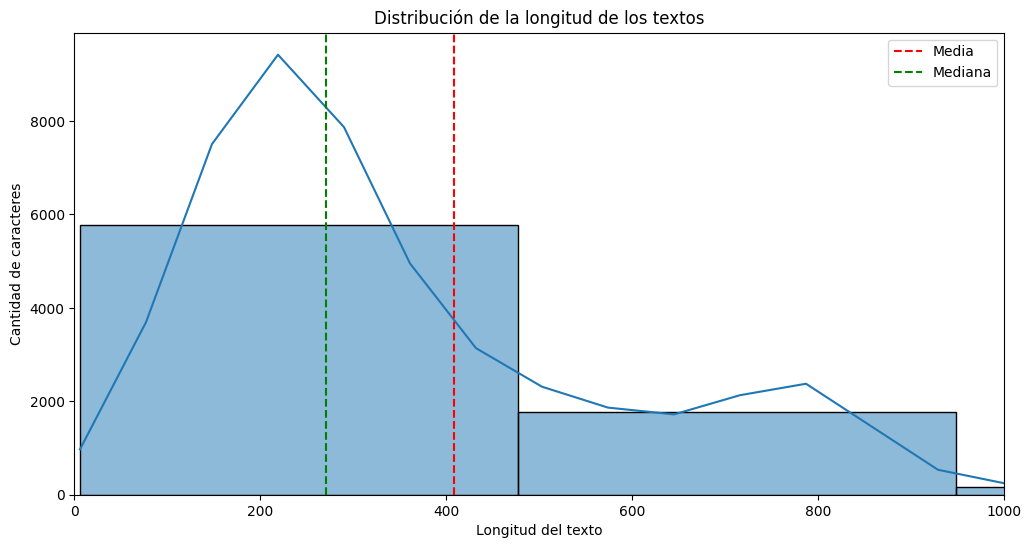

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Mirar la cantidad de palabras y hacer el grafico
df['longitud'] = df['Review'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['longitud'], bins=30, kde=True)
plt.xlim(0, 1000)

# Configurar etiquetas de los ejes y título del gráfico
plt.xlabel('Longitud del texto')
plt.ylabel('Cantidad de caracteres')
plt.title('Distribución de la longitud de los textos')

# Mostrar la tendencia central de los datos
plt.axvline(x=df['longitud'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(x=df['longitud'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()

# Mostrar el gráfico
plt.show()

# Eliminar la columna 'longitud' debido a que no nos sirve para la creación de los modelos
df.drop('longitud', axis=1, inplace=True)



A partir de la gráfica, se puede analizar que la columna "Review" tiene una longitud media de alrededor de 400 palabras, con una cantidad de caracteres que se encuentran principalmente en el rango de 5000 a 6000. Igualmente, se puede observar que la mediana de los datos de la columna "Review" es de aproximadamente 280 palabras, lo cual nos indica el valor que se encuentra en el centro de la distribución de las longitudes de los textos.

### 1.8.2 Grafica que nos muestra cuales son las palabras mas comunes en la columna Review teniendo en cuenta que no se tienen StopWords

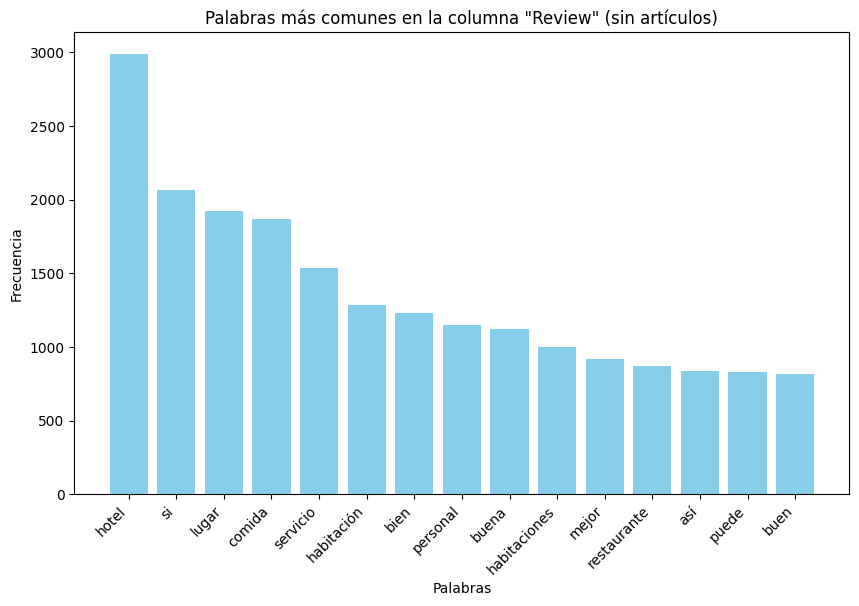

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


stop_words = set(stopwords.words('spanish'))

# Concatenar todos los textos en la columna 'Review'
all_text = ' '.join(df['Review'])
words = all_text.split()

# Filtrar palabras que no sean stopwords
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
word_freq = Counter(filtered_words)

# Seleccionar las palabras más comunes y mirar la frecuencia de los datos
num_words = 15
common_words = [(word, freq) for word, freq in word_freq.items() if word.isalpha()]
common_words = sorted(common_words, key=lambda x: x[1], reverse=True)[:num_words]
words, frequencies = zip(*common_words)

# Visualizar las palabras más comunes en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Palabras más comunes en la columna "Review" (sin artículos)')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


A partir de la gráfica anterior, se puede analizar las palabras más frecuentes en las reseñas hechas por los clientes. Esto es importante, ya que las reseñas de los clientes, tanto positivas como negativas, proporcionan información valiosa sobre la percepción de los consumidores acerca de un negocio o producto. Analizar las palabras más frecuentes en estas reseñas puede revelar patrones de opinión, temas recurrentes y aspectos destacados por los clientes. Esta información puede ser fundamental para comprender la satisfacción del cliente, identificar áreas de mejora y tomar decisiones estratégicas orientadas a la satisfacción del cliente y la mejora continua del negocio.

### 1.8.2 Mostrar grafica de Bigramas y Trigramas de la columna Review

#### 1.8.2.1 Mostrar grafica de Bigramas mas comunes

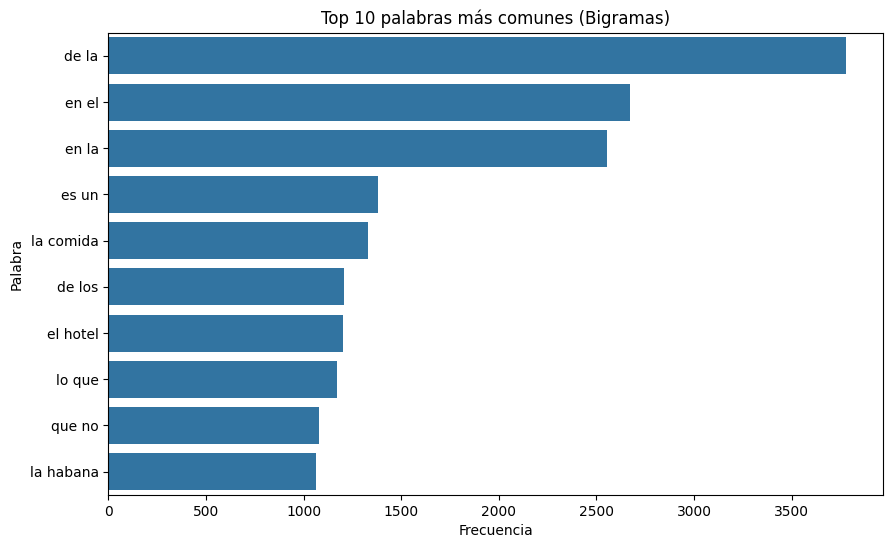

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Suponiendo que `df['Review']` contiene el corpus de textos
common_words = get_top_n_words(df['Review'], 10)

# Convertir la lista de tuplas a dos listas separadas para el gráfico
words = [word[0] for word in common_words]
freqs = [freq[1] for freq in common_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=words)
plt.title('Top 10 palabras más comunes (Bigramas)')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()


El gráfico de barras muestra los bigramas más frecuentes en el texto analizado, con "la habana" siendo el más recurrente, seguido de frases que incluyen términos comunes en reseñas como "el hotel", "la comida", y expresiones de lugar y cualidad como "en la" y "es un".

#### 1.8.2.2 Mostrar la grafica de los trigramas

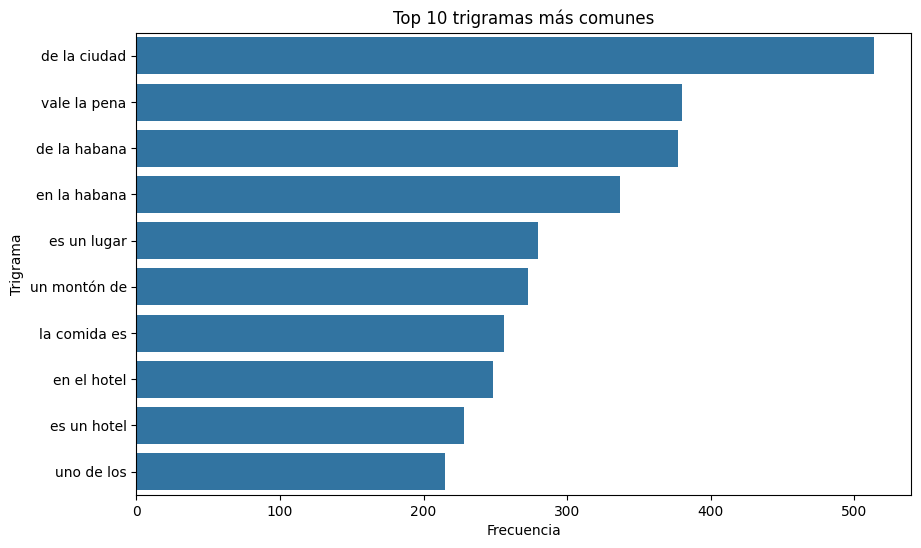

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)  # Cambiamos el rango a trigramas
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Suponiendo que `df['Review']` contiene el corpus de textos
common_words = get_top_n_words(df['Review'], 10)

# Convertir la lista de tuplas a dos listas separadas para el gráfico
words = [word[0] for word in common_words]
freqs = [freq[1] for freq in common_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=words)
plt.title('Top 10 trigramas más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Trigrama')
plt.show()


El gráfico de barras muestra los diez trigramas más comunes en el conjunto de datos, destacando frases relacionadas con lugares y valoraciones como "de la ciudad", "vale la pena" y "de la habana". Estos trigramas sugieren temas comunes en las reseñas, enfocándose en la ubicación y la calidad de la experiencia.

  A partir de las gráficas, podemos analizar los bigramas y trigramas más frecuentes en la columna "Review". Al identificar los bigramas y trigramas más frecuentes, se pueden revelar términos o combinaciones de palabras que son relevantes y significativas en el contexto de las reseñas, lo que puede ser útil para comprender mejor las opiniones y temas recurrentes expresados por los clientes.

### 1.8.3 Mostrar la grafica con las palabras mas largas de la columna Review

<ipython-input-17-6d471f4282e2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lengths, y=words, palette="viridis")


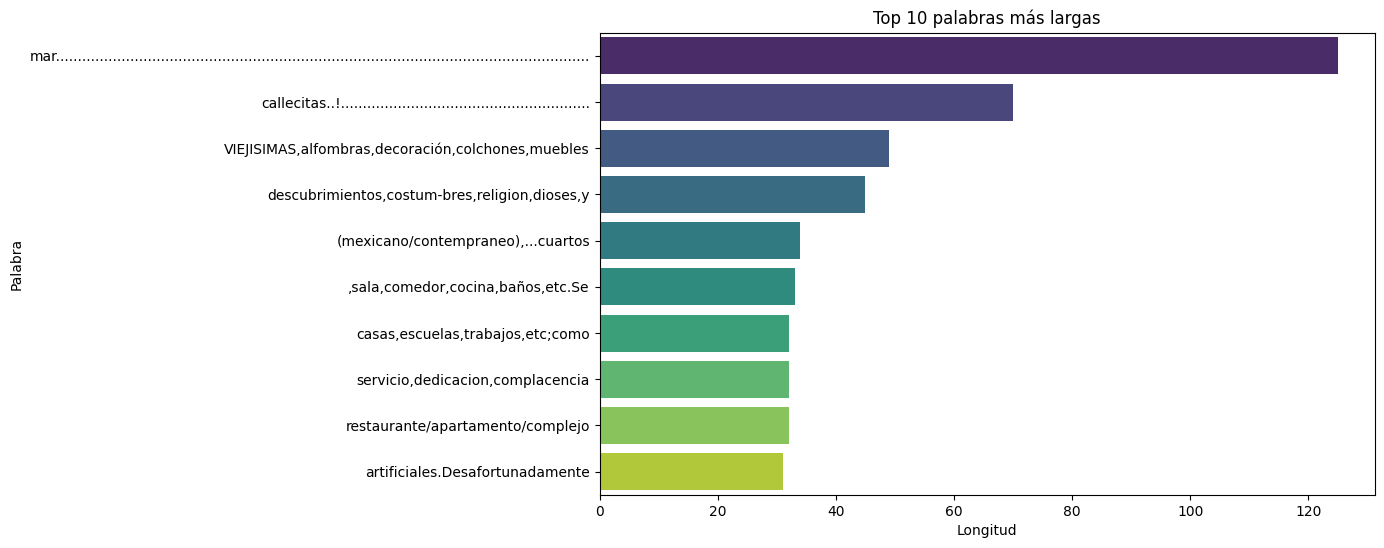

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_longest_words(corpus, n=10):
    words = ' '.join(corpus).split()
    words_lengths = [(word, len(word)) for word in words]
    words_lengths_sorted = sorted(words_lengths, key=lambda x: x[1], reverse=True)
    return words_lengths_sorted[:n]

longest_words = get_top_longest_words(df['Review'], 10)
words = [word[0] for word in longest_words]
lengths = [length[1] for length in longest_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=lengths, y=words, palette="viridis")
plt.title('Top 10 palabras más largas')
plt.xlabel('Longitud')
plt.ylabel('Palabra')
plt.show()


El gráfico de barras presenta las diez palabras más largas en el conjunto de datos, destacando términos complejos y compuestos en las reseñas, abarcando temas desde ubicaciones hasta características de servicios y espacios, como "restaurante/apartamento/complejo" y elementos culturales o históricos.

A partir de la grafica, se puede analizar que la columna Review tiene
varios problemas.Los datos estan siendo afectados por el exceso o la aparición de signos de puntuación, como también, estos datos se estan viendo afectados por la falta de espacios entre palabras.

# **2 LIMPIEZA Y PREPARACIÓN DE DATOS**

## 2.1 Eliminar registros que no están en español


Esta sección se encarga de identificar y separar los comentarios redactados en español del resto, lo que permite un análisis más enfocado y preciso de esta parte específica de los datos.

In [ ]:
!pip install langdetect
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except:
        return None


def deleteNonSpanish(df, print=False):
    df['language'] = df['Review'].progress_apply(detect_language)
    if print:
      #imprimir los idiomas
      display(df['language'].value_counts())
    df = df[df['language']=='es']
    return df
df = deleteNonSpanish(df, True)

  0%|          | 0/7875 [00:00<?, ?it/s]

language
es    7868
en       5
vi       1
pt       1
Name: count, dtype: int64

## 2.2 Tokenización

Se aplica una serie de pasos de preprocesamiento al texto. Primero, se reemplazan varios caracteres de puntuación por espacios para mejorar la segmentación del texto. Luego, se eliminan las palabras con dos o menos letras que no fueron removidas en el filtrado de palabras vacías (stopwords). Se procede a eliminar los caracteres no alfabéticos, se remueven los acentos y se convierten todas las palabras a minúsculas para homogeneizar el texto. Se filtran las stopwords y finalmente, se aplica este proceso al DataFrame, resultando en texto limpio y normalizado listo para análisis posteriores.

In [ ]:
def changeCharacters(text):
    """Reemplaza algunos separadores por espacios"""
    text = text.replace(',', ' ')
    text = text.replace('/', ' ')
    text = text.replace('.', ' ')
    text = text.replace('-', ' ')
    text = text.replace('\n', ' ')
    text = text.replace('!', ' ')
    return text

def deleteWrongWords(words):
    """Elimina palabras de dos o menos caracteres que no se eliminaron en los stopwords"""
    new = []
    for word in words:
      if len(word)>2:
        new.append(word)
    return new


def filterWords(text):
    """Elimina caracteres innecesarios, solo quedan palabras"""
    whitelist = set("abcdefghijklmnñopqrstuvwxyz ")
    return "".join(filter(whitelist.__contains__, text))

def remove_accents(text):
    """Elimina letras con tilde"""
    text = text.replace("á", "a")
    text = text.replace("é", "e")
    text = text.replace("í", "i")
    text = text.replace("ó", "o")
    text = text.replace("ú", "u")
    return text

def to_lowercase(words):
    """Convierte strings a minúscula"""
    return words.lower()

stopword = nltk.corpus.stopwords.words('spanish')
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stopword]

def preprocessing(words):
    words = changeCharacters(words)
    words = to_lowercase(words)
    words = remove_accents(words)
    words = filterWords(words)
    return words

In [ ]:
df['words'] = df['Review'].progress_apply(preprocessing)
df['words'] = df['words'].progress_apply(word_tokenize)
df['words'] = df['words'].progress_apply(remove_stopwords)
df['words'] = df['words'].progress_apply(deleteWrongWords)
df

  0%|          | 0/7868 [00:00<?, ?it/s]

  0%|          | 0/7868 [00:00<?, ?it/s]

  0%|          | 0/7868 [00:00<?, ?it/s]

  0%|          | 0/7868 [00:00<?, ?it/s]

,Review,Class,language,words
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,"[alojamos, casa, alquilada, ciudad, amurallada..."
1,"La comida está bien, pero nada especial. Yo te...",3,es,"[comida, bien, especial, tenia, mejor, comida,..."
2,"En mi opinión, no es una como muchos usuarios ...",3,es,"[opinion, usuarios, reclaman, gran, paladar, p..."
3,esta curiosa forma que asemeja una silla de mo...,4,es,"[curiosa, forma, asemeja, silla, montar, ahi, ..."
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,"[mejor, limonada, gusto, comida, mundo, sosa, ..."
...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es,"[motivo, estancia, vine, congreso, medico, hos..."
7871,Es difícil revisar el castillo porque apenas p...,3,es,"[dificil, revisar, castillo, apenas, podiamos,..."
7872,Si vas a Mérida no puedes perderte de este lug...,5,es,"[vas, merida, puedes, perderte, lugar, nueva, ..."
7873,"Este imperdible sitio, que lleva el nombre del...",5,es,"[imperdible, sitio, lleva, nombre, conquistado..."


## 2.3 Eliminar nulos

Se eliminan los valores nulos en la columna 'words' del DataFrame.

In [ ]:
df['words'].dropna()
df.shape

(7868, 4)

## 2.4 Normalización

Se define una función para lematizar verbos en una lista de palabras, utilizando el WordNetLemmatizer de NLTK. Lematiza solo las palabras con más de cuatro letras, manteniendo las más cortas en su forma original, y aplica esta función a la columna 'words' de un DataFrame, actualizando cada entrada con su conjunto correspondiente de lemas.




In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatizeVerbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmas = set()
    for word in words:
      if len(word) > 4:
        lemmas.add(lemmatizer.lemmatize(word))
      else:
        lemmas.add(word)
    return lemmas

df['words'] = df['words'].progress_apply(lemmatizeVerbs)
df.head()

  0%|          | 0/7868 [00:00<?, ?it/s]

,Review,Class,language,words
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,"{solo, ciudad, aqui, grupo, tiendas, alojamos,..."
1,"La comida está bien, pero nada especial. Yo te...",3,es,"{geniales, mejor, camarones, decepcionante, fa..."
2,"En mi opinión, no es una como muchos usuarios ...",3,es,"{trabajadores, experiencia, paladar, inferiore..."
3,esta curiosa forma que asemeja una silla de mo...,4,es,"{ciudad, asemeja, punto, asdnirr, cualquier, p..."
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,"{comida, gusto, frio, mejor, limonada, mundo, ..."


La columna 'words' del DataFrame se está actualizando para convertir los conjuntos de palabras en cadenas de texto, uniendo las palabras individuales con espacios.

In [ ]:
df['words'] = df['words'].apply(lambda x: ' '.join(map(str, x)))
df

,Review,Class,language,words
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,solo ciudad aqui grupo tiendas alojamos alquil...
1,"La comida está bien, pero nada especial. Yo te...",3,es,geniales mejor camarones decepcionante fajitas...
2,"En mi opinión, no es una como muchos usuarios ...",3,es,trabajadores experiencia paladar inferiores ed...
3,esta curiosa forma que asemeja una silla de mo...,4,es,ciudad asemeja punto asdnirr cualquier puedes ...
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,comida gusto frio mejor limonada mundo sosa
...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es,trabaja estancia aseo regadera congreso hotel ...
7871,Es difícil revisar el castillo porque apenas p...,3,es,oscuros menos viejo mas sofocante cemento extr...
7872,Si vas a Mérida no puedes perderte de este lug...,5,es,servida bien amplia sucursal excelente comida ...
7873,"Este imperdible sitio, que lleva el nombre del...",5,es,evita urbana joya impresiono limpieza privileg...


La lista muestra las diez palabras más largas extraídas del DataFrame, destacando términos que parecen ser altamente descriptivos.

In [ ]:
get_top_longest_words(df['words'], 10)

[('soooooooooooooooooooo', 21),
 ('responsabilizandose', 19),
 ('recomendabletambien', 19),
 ('arquitecronicamente', 19),
 ('arquitectonicamente', 19),
 ('extraordinariamente', 19),
 ('mercadonaconclusion', 19),
 ('gastroenterocolitis', 19),
 ('desafortunadamente', 18),
 ('significativamente', 18)]

## 2.5 Vectorización

Se crea una representación numérica TF-IDF de las palabras en el DataFrame, equilibra las clases mediante el método SMOTE y divide los datos en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['words'])

sm = SMOTE(random_state=42)
X, y_data = sm.fit_resample(X, df['Class'])


X_train, X_test, Y_train, Y_test = train_test_split(X, y_data, test_size=0.2, random_state=42)

# **3 MODELADO**

## 3.1 (Multiclass) Logistic Regression

La regresión logística multiclase es un algoritmo de aprendizaje supervisado utilizado para predecir la probabilidad de una variable dependiente categórica, basada en una o más variables independientes, y es especialmente útil en situaciones donde buscamos clasificar elementos en categorías distintas. Trabaja estimando las probabilidades que indican la pertenencia de una observación a una determinada clase. Para lograr esto en un contexto multiclase, empleamos la estrategia llamada "uno contra el resto" (OvR), que entrena modelos específicos para cada par de clases. Independientemente del método, el objetivo final es el mismo: determinar la probabilidad de que una observación dada pertenezca a cada una de las clases disponibles.

La regresión logística multiclase adapta la lógica de su contraparte binaria, pero en lugar de producir una única probabilidad de pertenencia a una clase, genera un conjunto de probabilidades, una para cada clase. Esto se consigue modelando la relación entre las características de las observaciones y la probabilidad de las categorías de clasificación. A través del proceso de entrenamiento, el modelo "aprende" cómo diferentes patrones en los datos se asocian con cada clase, asignando "pesos" a las características que reflejan su importancia para predecir la clase de una observación.

### 3.1.1 Definición del modelo y Parametrización

Se realiza el proceso de selección y optimización de hiperparámetros para un modelo de Regresión Logística, aplicando la técnica de validación cruzada. A través del uso de **GridSearchCV**, se busca encontrar la mejor configuración de hiperparámetros, tales como la fuerza de la regularización y el algoritmo de optimización, para maximizar la precisión del modelo. La validación cruzada, implementada mediante **KFold**, garantiza que la evaluación del modelo sea robusta y menos propensa a sobreajustes, al dividir el conjunto de datos en varias particiones y utilizarlas de manera iterativa para el entrenamiento y la validación. Al final del proceso, se obtienen los hiperparámetros óptimos que conducen a la mejor performance del modelo, indicada por la métrica de puntuación, lo que refleja la capacidad del modelo para clasificar con precisión nuevas instancias basándose en los datos de entrenamiento proporcionados.



```
Best params:  {'C': 800, 'penalty': 'l2', 'solver': 'newton-cg'}
```



In [ ]:
params_logreg = {'C': [800],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty': ['l2']}

particiones = KFold(n_splits=10, shuffle=True, random_state=0)
linearR = LogisticRegression()

linearR = GridSearchCV(linearR, params_logreg, cv=particiones, n_jobs=-1, scoring='f1_weighted')
linearR.fit(X_train, Y_train)

print("Best params: ", linearR.best_params_)
print("Score: ", linearR.best_score_)

Best params:  {'C': 800, 'penalty': 'l2', 'solver': 'newton-cg'}
Score:  0.7218337869059294


### 3.1.2 Predicción de Clasificaciones

Se realizan predicciones de clasificación con el modelo de Regresión Logística previamente entrenado. Primero, se utiliza el conjunto de entrenamiento (X_train) para predecir las clasificaciones correspondientes y se almacenan en Y_train_predictLR. Luego, se repite el proceso con el conjunto de prueba (X_test), guardando las predicciones en Y_test_predictLR.

In [ ]:
Y_train_predictLR = linearR.predict(X_train)
Y_test_predictLR = linearR.predict(X_test)

### 3.1.3 Métricas de Training

Se observa que el modelo ha alcanzado una precisión, recall y puntuación F1 perfectas de 1.00 para cada una de las cinco clases, lo que indica que ha clasificado correctamente todas las instancias del conjunto de entrenamiento. La precisión es la proporción de identificaciones positivas verdaderas entre todas las identificaciones positivas (tanto verdaderas como falsas), mientras que el recall mide la proporción de positivos verdaderos identificados correctamente. La puntuación F1 es el promedio armónico de la precisión y el recall, ofreciendo un balance entre ambos. La precisión global del modelo también es del 100%, lo cual es excepcionalmente alto.

In [ ]:
print(classification_report(Y_train, Y_train_predictLR))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1883
           2       1.00      1.00      1.00      1898
           3       1.00      1.00      1.00      1887
           4       1.00      1.00      1.00      1869
           5       1.00      1.00      1.00      1855

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



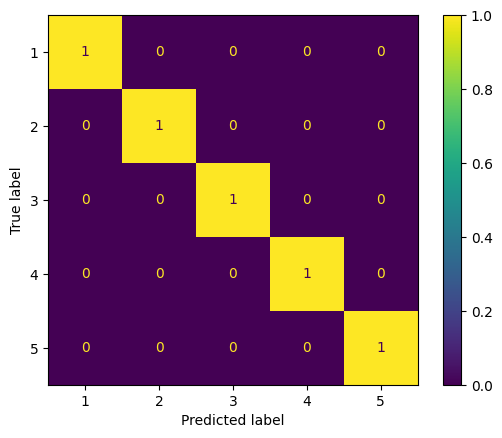

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_predictLR, normalize='true')

La matriz de confusión obtenida muestra resultados ideales, indicando una clasificación precisa de todas las instancias sin errores.

### 3.1.4 Métricas de Testing

In [ ]:
print(classification_report(Y_test, Y_test_predictLR))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       465
           2       0.83      0.91      0.87       450
           3       0.70      0.69      0.70       461
           4       0.57      0.54      0.56       479
           5       0.68      0.61      0.64       493

    accuracy                           0.74      2348
   macro avg       0.74      0.74      0.74      2348
weighted avg       0.73      0.74      0.74      2348



El informe de clasificación generado para la Regresión Logística ofrece una visión detallada sobre el desempeño del modelo en el conjunto de prueba. Observamos que la clase 1 tiene el rendimiento más alto en términos de precisión y recall, indicando una fuerte capacidad para identificar correctamente esta clase. La precisión de 0.90 y un recall de 0.96 para esta clase se traducen en un F1 score de 0.93, lo que demuestra una alta eficiencia en la clasificación correcta de estas instancias. La clase 2 también presenta buenos resultados, aunque con un leve descenso en las métricas comparado con la clase 1, con un F1 score de 0.87.

Sin embargo, para las clases 3, 4 y 5, notamos una disminución progresiva en todas las métricas. La clase 3 tiene una precisión de 0.70 y un recall de 0.69, resultando en un F1 score de 0.70, lo cual sugiere que el modelo aún puede manejar razonablemente bien estas categorías, pero con margen de mejora. Las clases 4 y 5 muestran una mayor dificultad para el modelo, con precisiones de 0.57 y 0.68 respectivamente, y recalls aún más bajos. Los F1 scores de estas clases, 0.56 para la clase 4 y 0.64 para la clase 5, indican un rendimiento moderado que señala la necesidad de afinar el modelo para mejorar la identificación y clasificación correcta de estas instancias.

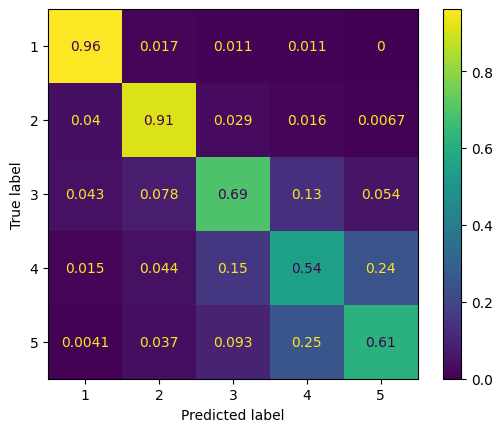

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_predictLR, normalize='true')

Basándonos en la matriz de confusión de la Regresión Logística, se evidencia que el modelo es bastante eficaz para clasificar correctamente las clases 1 y 2, con porcentajes de acierto del 96% y 91%, respectivamente. Esto indica que para estas clases, el modelo tiene una alta precisión y es muy confiable en sus predicciones.

Sin embargo, cuando observamos las clases 3, 4 y 5, la efectividad disminuye significativamente. La clase 3 tiene una tasa de clasificación correcta del 69%, mientras que las clases 4 y 5 tienen tasas del 54% y 61%, respectivamente. Esto sugiere que el modelo tiene más dificultades para distinguir estas clases, lo que podría deberse a una superposición de características o a la falta de características distintivas aprendidas por el modelo para estas clases específicas.

Otro aspecto notable es la confusión entre las clases 3, 4 y 5. Por ejemplo, hay una confusión del 13% entre la clase 3 y la clase 4, y un 24% de las instancias de la clase 4 son clasificadas incorrectamente como clase 5. Estos errores podrían ser el resultado de similitudes en las características de estas clases, lo que causa dificultades para el modelo al hacer una distinción clara.

El modelo también muestra errores significativos al clasificar instancias de la clase 5, donde aproximadamente un 39% de las instancias son clasificadas incorrectamente como pertenecientes a otras clases. Esto es especialmente notorio con la clase 4, que representa el 25% de las confusiones.

## 3.2 Ridge Classifier

Ridge Classifier es un algoritmo de machine learning diseñado para tareas de clasificación multiclase. Combinando ideas de técnicas convencionales de clasificación y Ridge Regression, este ofrece un método distinto para clasificación de datos. La regularización L2 usada por Ridge Classifier, que está basada en Ridge Regression, detiene el overfitting añadiendo una penalización que es manejada por el hiper parámetro alfa. Esta regularización ayuda a preservar el equilibrio entre la complejidad del modelo y ajustar los datos.
Ridge Classifier usa una función de pérdida parecida al error cuadrático medio. La fuerza de regularización se ajusta con el parámetro alpha, que también regula como la penalización afecta los coeficientes del modelo.

Elegimos este modelo como uno de los candidatos, porque está específicamente diseñado para clasificación multiclase, también este modelo ofrece un equilibrio óptimo entre precisión y generalización, especialmente en situaciones donde las características están altamente correlacionadas, y finalmente, esta técnica de regularización también proporciona una mayor estabilidad en la solución del problema de clasificación.


### 3.2.1 Definición del modelo y Parametrización

Se realiza hiperparametrización del modelo para determinar la configuración óptima del modelo. Ajustar adecuadamente el valor de alpha es fundamental, ya que controla el grado de penalización aplicado a los coeficientes del modelo durante el entrenamiento.

In [ ]:
ridge = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ridge = GridSearchCV(estimator=ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
ridge.fit(X_train, Y_train)

print("Best: %f using %s" % (ridge.best_score_, ridge.best_params_))

Best: 0.712853 using {'alpha': 0.1}


### 3.2.2 Predicción de Clasificaciones

In [ ]:
Y_train_predictRC = ridge.predict(X_train)
Y_test_predictRC = ridge.predict(X_test)

### 3.2.3 Métricas de Training

In [ ]:
print(classification_report(Y_train, Y_train_predictRC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1883
           2       1.00      1.00      1.00      1898
           3       1.00      1.00      1.00      1887
           4       1.00      1.00      1.00      1869
           5       1.00      1.00      1.00      1855

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



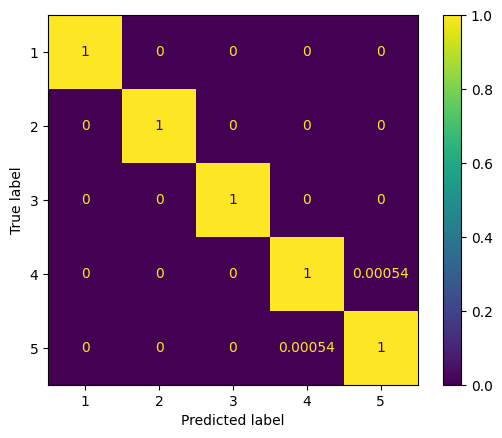

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_predictRC, normalize='true')

### 3.2.4 Métricas de Testing

In [ ]:
print(classification_report(Y_test, Y_test_predictRC))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       465
           2       0.82      0.91      0.86       450
           3       0.68      0.67      0.68       461
           4       0.56      0.56      0.56       479
           5       0.66      0.57      0.61       493

    accuracy                           0.73      2348
   macro avg       0.73      0.73      0.73      2348
weighted avg       0.72      0.73      0.72      2348



El modelo muestra resultados aceptables basados en las métricas de precision, recall y F1-score. Con una weighted avg precision del 72%, el modelo clasifica correctamente alrededor del 72% de los datos en promedio. Esto sugiere una capacidad razonable para predecir las clases correctas. Además, con un weighted avg recall del 73%, el modelo clasifica correctamente alrededor del 73% de todas los registros de las clases en promedio, lo que indica una buena capacidad para identificar las clases verdaderas. El weighted avg F1-score del 72% refleja un equilibrio entre precision y recall. En conjunto, estas métricas sugieren que el modelo es capaz de realizar buenas predicciones, aunque puede mejorar.

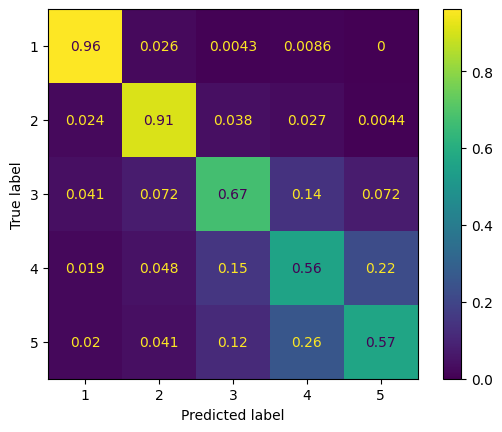

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_predictRC, normalize='true')

Al analizar los valores de la matriz, se observa que el modelo muestra un rendimiento generalmente bueno, con altos puntajes de registros correctamente clasificados en la diagonal principal. Sin embargo, también se identifican varios problemas. Por ejemplo, para las clases 3, 4 y 5, se observan varios datos clasificados incorrectamente como otras clases, lo que sugiere dificultades en la distinción entre estas clases específicas.

## 3.3 Support Vector Machine


El algoritmo de Support Vector Machine (SVM) es un método de aprendizaje supervisado utilizado para la clasificación y regresión. Su funcionamiento se basa en encontrar un hiperplano en un espacio de alta dimensión que pueda separar de la mejor manera posible los puntos de datos de diferentes clases. Este hiperplano se define como el vector entre los dos puntos más cercanos de las clases, conocidos como vectores de soporte. La idea es maximizar el margen entre las clases, es decir, encontrar el hiperplano que maximice la distancia entre los puntos de datos de diferentes clases, lo que permite una mejor generalización y capacidad de predicción.

La selección de este modelo se basa en que SVM esta enfocado en la clasificación y es bueno debido a su alta dimensionalidad, flexibilidad y adaptabilidad a los datos. En el caso de negocio de Turismo de los alpes, es beneficioso hacer el uso de este modelo debido a que este modelo puede manejar muchas opiniones diferentes y encontrar patrones en ellas, incluso si las opiniones son complicadas o demasiado tecnicas.

Igualmente, SVM tiene la capacidad para manejar datos de alta dimensionalidad, lo que es común en el análisis de texto donde cada palabra puede ser considerada como una característica. Esto es especialmente relevante en el contexto de negocio (Turismo), donde las opiniones pueden abarcar una amplia gama de temas y aspectos, desde la calidad de los servicios hasta las experiencias culturales y naturales

### 3.3.1 Definición del modelo y Parametrización

Estas líneas de código están realizando una búsqueda de los mejores parámetros para nuestro modelo de Support Vector Machine (SVM) utilizando validación cruzada. En las lineas se puede ver el uso de GridSearch para conseguir los mejores Hiperparametros y se hace uso de SVC para la creacion del modelo.

In [ ]:
#Tener en cuenta que la ejecuccion de esta celda se demora 25-30 minutos a la hora de entrenar el modelo

paramsSVC = {'kernel': ['poly'],
             'C': [10, 1.0, 0.1, 0.01],
             'gamma': ['scale']
}

svc = SVC()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
svc = GridSearchCV(estimator=svc, param_grid=paramsSVC, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)

svc.fit(X_train, Y_train)


print("Best params: ", svc.best_params_)
print("Score: ", svc.best_score_)

Best params:  {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
Score:  0.7500582842219778


### 3.2.2 Predicción de Clasificaciones

In [ ]:
Y_train_predictSVC = svc.predict(X_train)
Y_test_predictSVC = svc.predict(X_test)

### 3.2.3 Métricas de Training

In [ ]:
print(classification_report(Y_train, Y_train_predictSVC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1883
           2       1.00      1.00      1.00      1898
           3       1.00      1.00      1.00      1887
           4       1.00      1.00      1.00      1869
           5       1.00      1.00      1.00      1855

    accuracy                           1.00      9392
   macro avg       1.00      1.00      1.00      9392
weighted avg       1.00      1.00      1.00      9392



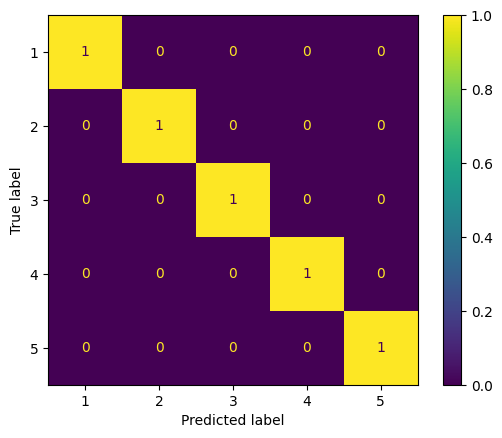

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train, Y_train_predictSVC, normalize='true')

### 3.2.4 Métricas de Testing

In [ ]:
print(classification_report(Y_test, Y_test_predictSVC))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97       465
           2       0.98      0.85      0.91       450
           3       0.95      0.63      0.76       461
           4       0.60      0.64      0.62       479
           5       0.57      0.81      0.67       493

    accuracy                           0.77      2348
   macro avg       0.82      0.77      0.78      2348
weighted avg       0.81      0.77      0.78      2348



Las métricas de precisión media, recall promedio y F1 score son fundamentales para el negocio, especialmente al predecir la satisfacción de los clientes basándose en las reseñas. Estas métricas proporcionan una evaluación integral del rendimiento del modelo en la clasificación de las reseñas, lo que es esencial para comprender la satisfacción del cliente y mejorar la calidad del servicio.


A partir de los resultados para el modelo SVM, se obtuvo una precisión media de 0.81, un recall promedio de 0.77 y un F1 score de 0.78. Estas métricas indican que el modelo SVM tiene un promedio de exactitud a la hora de predecir las reseñas, teniendo en cuenta tanto la precisión (proporción de predicciones correctas) como el recall (capacidad para identificar correctamente las reseñas positivas). El F1 score, al combinar la precisión y el recall, proporciona una medida equilibrada del rendimiento del modelo en la clasificación de las reseñas, lo que es beneficioso para comprender y predecir la satisfacción de los clientes de manera efectiva.

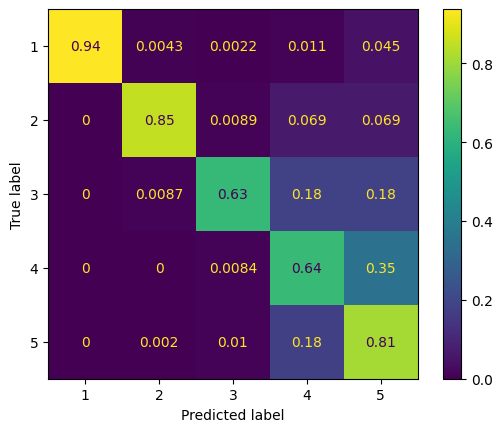

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_predictSVC, normalize='true')

A partir de la grafica, se puede realizar el siguiente analisis teniendo en cuenta que se hizo uso del modelos SVM.

Basándonos en los resultados y la gráfica generada por el modelo SVM, se puede considerar que el modelo está realizando la clasificación de manera adecuada, ya que logra identificar correctamente el 94% de la clase 1. Aunque se observa un pequeño porcentaje de confusiones con otras clases, como un 4.3% con la clase 2, un 0.22% con la clase 3, un 1.1% con la clase 4 y un 4.5% con la clase 5, el alto porcentaje de identificación correcta de la clase 1 sugiere que el modelo está teniendo un desempeño positivo en la clasificación.


Sin embargo, es importante analizar por qué se están generando errores al predecir, especialmente considerando que el mayor error se presenta en relación a la clase 5. Asimismo, el modelo muestra deficiencias al predecir las reseñas de las clases 3 y 4, lo que indica la necesidad de realizar ajustes o mejoras en el modelo para mejorar su capacidad predictiva.


En resumen, aunque el modelo SVM muestra un buen rendimiento al identificar la clase 1, es crucial investigar las razones detrás de las confusiones con otras clases y trabajar en la mejora de la precisión del modelo en la clasificación de las clases 3, 4 y 5.

# **4 EVALUACIÓN**

Teniendo en cuenta las métricas de Testing de los tres modelos, decidimos que SVC era el modelo más adecuado para la tarea. Como evidenciamos en el analisis de SVC, el modelo está clasificando correctamente una gran cantidad de registros para cada clase. Además es el modelo con métricas más altas, por lo que interpretamos que SVC es el más capaz de ofrecer un rendimiento sólido y equilibrado en términos de precisión y capacidad de clasificación para esta tarea específica.

## 4.1 Palabras con más impacto en cada Clase

In [ ]:
df1 = df[df['Class'] == 1]
df2 = df[df['Class'] == 2]
df3 = df[df['Class'] == 3]
df4 = df[df['Class'] == 4]
df5 = df[df['Class'] == 5]

clases = [df1, df2, df3, df4, df5]

In [ ]:
def getVectWeights(data):
  vect = TfidfVectorizer()
  x = vect.fit_transform(data['words'])
  vect.get_feature_names_out()

  vect_score = np.asarray(x.mean(axis=0)).ravel().tolist()
  vect_array = pd.DataFrame({'term': vect.get_feature_names_out(), 'weight': vect_score})
  vect_array.sort_values(by='weight',ascending=False,inplace=True)

  return vect_array.head(10)

In [ ]:
for i in range(len(clases)):
  print('Palabras de más impacto en la clase ', i+1)
  display(getVectWeights(clases[i]))
  print('\n')

Palabras de más impacto en la clase  1


,term,weight
4523,mas,0.027789
3666,hotel,0.023425
6696,servicio,0.020212
1511,comida,0.020003
3495,habitacion,0.017840
4365,lugar,0.016803
6831,solo,0.016306
5428,personal,0.016269
6358,restaurante,0.015005
4399,mal,0.013956




Palabras de más impacto en la clase  2


,term,weight
5384,mas,0.027193
4417,hotel,0.023505
1797,comida,0.021033
5205,lugar,0.019292
7895,servicio,0.018972
4236,habitacion,0.018875
8070,solo,0.016099
1009,bien,0.015903
4237,habitaciones,0.015556
1123,buena,0.014544




Palabras de más impacto en la clase  3


,term,weight
5923,mas,0.026752
5723,lugar,0.022518
2025,comida,0.020868
4834,hotel,0.020158
1131,bien,0.018617
1253,buena,0.017823
8653,servicio,0.017574
4617,habana,0.015236
9850,vista,0.014523
8835,solo,0.014271




Palabras de más impacto en la clase  4


,term,weight
5603,lugar,0.024534
5805,mas,0.021832
1261,buena,0.021098
2000,comida,0.019525
4766,hotel,0.018691
1129,bien,0.018369
8534,servicio,0.018308
1260,buen,0.016792
1836,ciudad,0.016373
9759,vista,0.015828




Palabras de más impacto en la clase  5


,term,weight
2214,comida,0.025949
4133,excelente,0.025775
6036,lugar,0.024339
9132,servicio,0.022743
6244,mas,0.021081
943,atencion,0.018767
1415,buena,0.017753
5113,hotel,0.016658
1265,bien,0.016381
10393,vista,0.015893


## 4.2 Etiqueta de datos

In [ ]:
df2Predict = pd.read_csv("/content/particion_prueba_estudiantes.csv")

In [ ]:
df2Predict = deleteNonSpanish(df2Predict)

def prepareData(words):
  words = preprocessing(words)
  words = word_tokenize(words)
  words = remove_stopwords(words)
  words = deleteWrongWords(words)
  words = lemmatizeVerbs(words)
  return ' '.join(map(str, words))

df2Predict['words'] = df2Predict['Review'].progress_apply(prepareData)

  0%|          | 0/1748 [00:00<?, ?it/s]

  0%|          | 0/1748 [00:00<?, ?it/s]

In [ ]:
xPred = vectorizer.transform(df2Predict['words'])
df2Predict['Predicted'] = svc.predict(xPred)
df2Predict['Predicted'].value_counts()

Predicted
5    986
4    586
3    111
2     58
1      7
Name: count, dtype: int64

In [ ]:
df2Predict = df2Predict.drop('words', axis=1)
df2Predict = df2Predict.drop('language', axis=1)

In [ ]:
df2Predict.to_csv('predicted.csv', index=False)